In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import seaborn
import sympy as sm
import sympy.physics.vector as vc
sm.init_printing()

## Άσκηση 2
Κυλινδρική έλικα έχει εξίσωση $\big( \varpi =R,z=RA(1-e^{\phi/A}) \big)$},όπου $R$ η κυλινδρική ακτίνα και $A$ σταθερά. Δαχτυλίδι είναι περασμένο και κινείται στην έλικα αυτή με τρόπο ώστε η αζιμουθιακή
γωνία αυξάνεται γραμμικά με το χρόνο, $\phi = A \lambda t$ με σταθερό $\lambda$.
* Βρείτε την ταχύτητα και την επιτάχυνση του δαχτυλιδιού σε κάθε χρόνο.
* Ποιά είναι η ακτίνα Καμπυλότητας
* Ποια η ακτίνα καμπυλότητας της έλικας;
* Αν η μάζα του δαχτυλιδιού είναι m πόση ενέργεια δίνει ή παίρνει συνολικά (από $t = 0$ ως πολύ μεγάλους χρόνους) αυτός που φροντίζει η κίνηση του δαχτυλιδιού να γίνεται με $\phi = A \lambda t$; (Αγνοήστε βάρος και τριβές.)

In [2]:
p,z,f,t=sm.symbols('p,z,\phi,t', real=True, positive=True)
R,A,l,m=sm.symbols('R,A,\lambda,m', real=True, positive=True)

In [4]:
p=R
f=A*l*t
z=R*A*(sm.Float(1)-sm.exp(-f/A))

### Κυλινδρικές Συντεταγμένες
$$
\vec{v}=\dot{p} \hat{p} +p\dot{\phi} \hat{\phi}+\dot{z}\hat{z}
$$

$$
\vec{a}=(\ddot{p}-p\dot{\phi}^2)\hat{p} +(2\dot{p}\dot{\phi}+p\ddot{\phi}) \hat{\phi}+\ddot{z}\hat{z}
$$

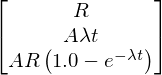

In [5]:
r=sm.Matrix([[p],[f],[z]])
r

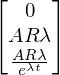

In [6]:
v=sm.Matrix([[sm.diff(p,t)],[p*sm.diff(f,t)],[sm.diff(z,t)]])
v

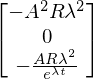

In [7]:
a=sm.Matrix([[sm.diff(p,t,2)-p*sm.diff(f,t)**2],[2*sm.diff(p,t)*sm.diff(f,t)+p*sm.diff(f,t,2)],[sm.diff(z,t,2)]])
a

## Επιτρόχιος και κεντρομόλος επιτάχυνση
Η επιτρόχιος επιτάχυνση βρίσκεται από τη:
$$
\vec{a}_e = (\vec{a}\cdot \vec{e}) \vec{e}
$$
με το επιτρόχιο διάνυσμα $\vec{e} =\frac{\vec{V}}{|V|}$

ενώ η κεντρομόλος επιτάχυνση βρίσκεται από τη:
$$
\vec{a}_k = (\vec{a}\cdot \vec{n}) \vec{n}
$$
με το κάθετο διάνυσμα $\vec{n} =\frac{\vec{a}}{|a|}$

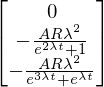

In [8]:
e=v/v.norm()
a_e=a.dot(e)*e
sm.simplify(a_e)

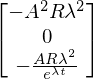

In [9]:
n=a/a.norm()
a_k=a.dot(n)*n
sm.simplify(a_k)

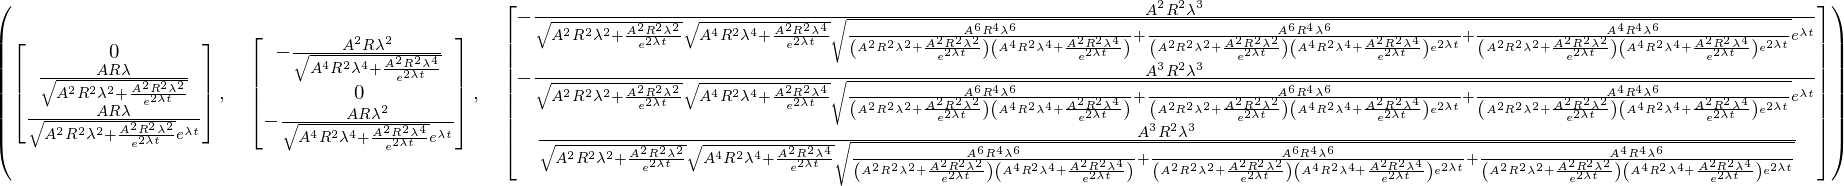

In [171]:
b=e.cross(n)
b=b/b.norm()
e,n,b

## Ακτίνα Καμπυλότητας
Η ακτίνα καμπυλότητας δίνεται από τη σχέση:
$$
R=k^{-1}=\frac{|\vec{v}^3|}{|\vec{v}\times\vec{a}|} 
$$

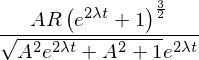

In [10]:
s=v.cross(a)
RR=v.norm()**3/s.norm()
sm.simplify(RR)

## Ενέργεια
Το έργο της δύναμης είναι:
$$
E=\int _0 ^\infty m \vec{a}\cdot{d\vec{r}} = \int _0 ^\infty m \vec{a}\cdot\vec{v} dt
$$

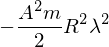

In [11]:
sm.integrate(m*a.dot(v),(t,0,sm.oo))

In [12]:
sub={R:1.,A:5.,l:0.1}

In [13]:
pn = sm.lambdify(t,r[0].subs(sub),"numpy")
fn = sm.lambdify(t,r[1].subs(sub),"numpy")
zn = sm.lambdify(t,r[2].subs(sub),"numpy")
tt=np.arange(0.,150.,0.2)

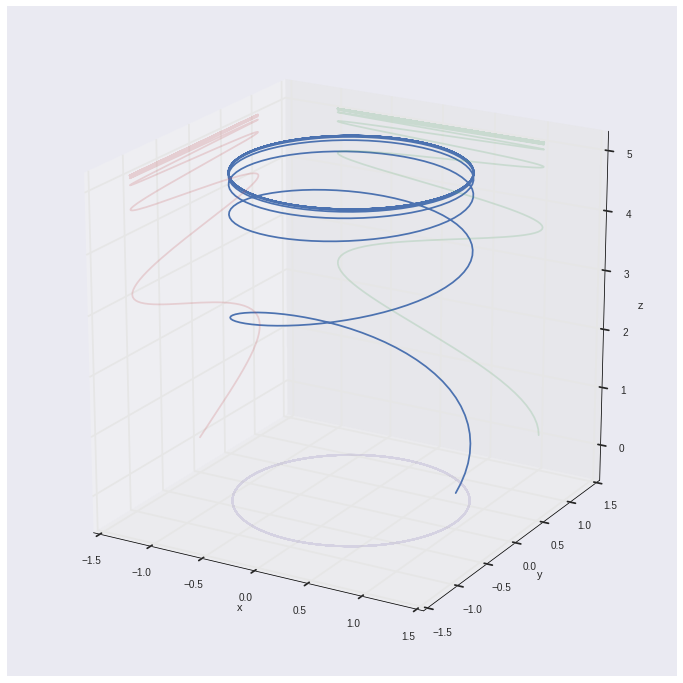

In [14]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.view_init(elev=20)#, azim=40)
ax.set_zlim([-0.5, 5.2])
ax.set_zlabel('z')
ax.set_ylim([-1.5, 1.5])
ax.set_ylabel('y')
ax.set_xlim([-1.5, 1.5])
ax.set_xlabel('x')
x=pn(tt)*np.cos(fn(tt))
y=pn(tt)*np.sin(fn(tt))
z=zn(tt)
ax.plot(x,y,z)
ax.plot(x,z,  zdir='y', zs=1.5,alpha=0.2)
ax.plot(y,z,  zdir='x', zs=-1.5,alpha=0.2)
ax.plot(x,y,  zdir='z', zs=-0.5,alpha=0.2)